## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [193]:
tips=pd.read_csv('tips.csv')

### 1. Make a list of categorical and numerical columns in the data.

In [194]:
cat=[]
num=[]
for i in tips.columns:
    if tips[i].dtypes=='object':
        cat.append(i)
    else:
        num.append(i)

In [197]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [203]:
print('The categorical variables are:', cat,'\n')
print('The Numerial variables are:', num,'\n')

The categorical variables are: ['sex', 'smoker', 'day', 'time'] 

The Numerial variables are: ['total_bill', 'tip', 'size'] 



### 2. Compute the average bill amount for each day.

In [15]:
tips.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [16]:
tips.groupby('sex')['tip'].mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

In [ ]:
#According to given dataset since average of Male is higher than female hence we can conclude Male Gender are more generous in giving tips

### 4. According to the data, were there more customers for dinner or lunch?

In [17]:
tips.groupby('time')['size'].sum()

time
Dinner    463
Lunch     164
Name: size, dtype: int64

In [ ]:
#As per given dataset since sum of size of people more for dinner, hence we can conclude there are more customers for Dinner instead Lunch

### 5. Based on the statistical summary, comment on the variable 'tip'

In [18]:
tips.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [ ]:
#As per above summary we can say mean and meadian are almost same, hence we can conclude almost 3 doller is being given as tip the customers, however there are 
#few are outliers paying 10 doller as a tips while minimum amount getting paid by the customers are 1 doller

### 6. Find the busiest day in terms of the orders?

In [19]:
tips.day.mode()[0]

'Sat'

In [ ]:
#According to dataset sice most of the occerance is Saterday, hece we can say it's buiest day in terms of orders

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

In [20]:
tips['total_bill'].skew()

1.1332130376158205

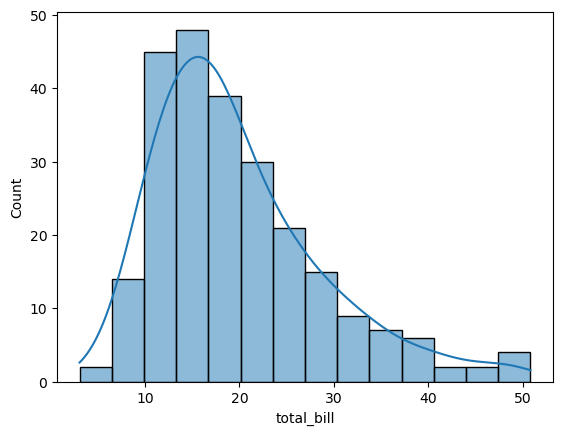

In [21]:
sns.histplot(tips['total_bill'], kde=True)
plt.show()

In [ ]:
#with the above outcome we can easyly say in the given data Total Bill is very well skewed, which is positive means it's rightly
#skewed as value are positive. And the same is clearly visible in the distribution plot

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [22]:
tips[['total_bill','tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [ ]:
#With the corrletion matrix, we can easily say tip and total bill are positivly relatated meaning when total bill increases tip
#also incrases. Same can see in the plot in the below diagram

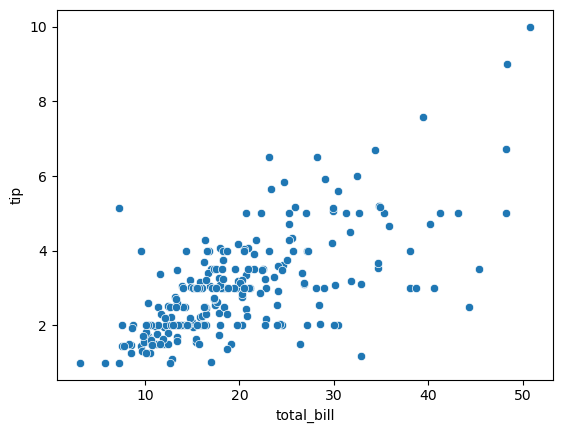

In [23]:
sns.scatterplot(x='total_bill',y='tip', data=tips)
plt.show()

### 9. What is the percentage of males and females in the dataset? and display it in the plot

In [24]:
round(tips.sex.value_counts(normalize=True)*100,2)

sex
Male      64.34
Female    35.66
Name: proportion, dtype: float64

In [ ]:
#With the given dataset we can say male customers are 64.34% are males while 35.66% are females. Same we can see in the plot below

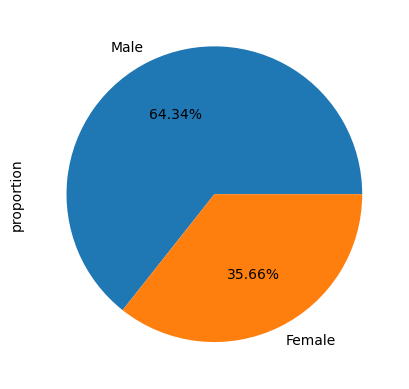

In [25]:
tips.sex.value_counts(normalize=True).plot(kind='pie', autopct='%0.2f%%')
plt.show()

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [26]:
tips.pivot_table(index='sex', columns='smoker', values='size', aggfunc=np.sum)

smoker,No,Yes
sex,,
Female,140,74
Male,263,150


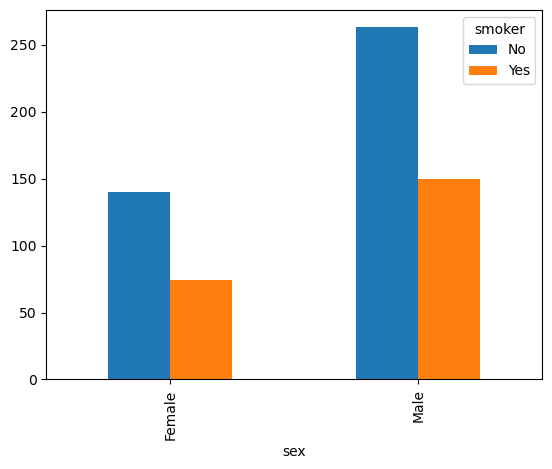

In [137]:
tips.pivot_table(index='sex', columns='smoker', values='size', aggfunc=np.sum).plot(kind='bar')
plt.show()

### 11. Compute the average tip amount given for different days and display it in the plot.

In [27]:
tips.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

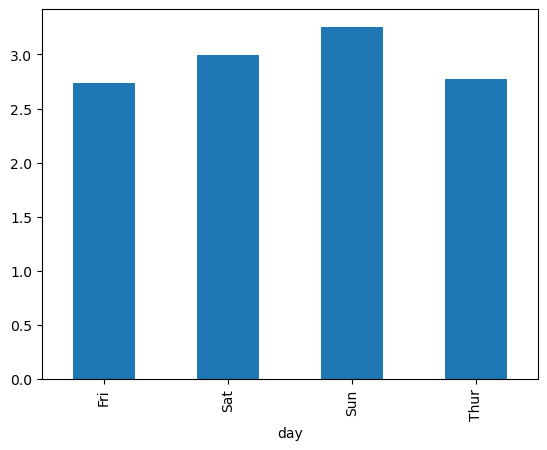

In [28]:
tips.groupby('day')['tip'].mean().plot(kind='bar')
plt.show()

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

In [29]:
tips.groupby('size')['total_bill'].mean()

size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64

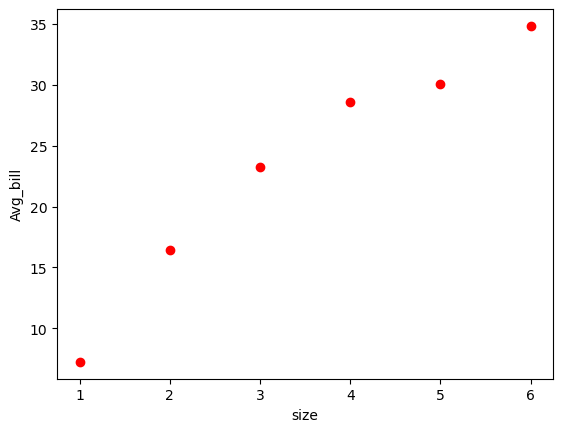

In [30]:
a=tips.groupby('size')['total_bill'].mean().reset_index()
plt.scatter(x=a['size'], y=a['total_bill'], color='red')
plt.xlabel('size')
plt.ylabel('Avg_bill')
plt.show()

In [182]:
#With the above summary we can say tip value is dependent on avearge bill based on size of the members. Same can be 
#seen in scatter plot which clearly shows when size of the members increses average bill also increases in positive direction

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

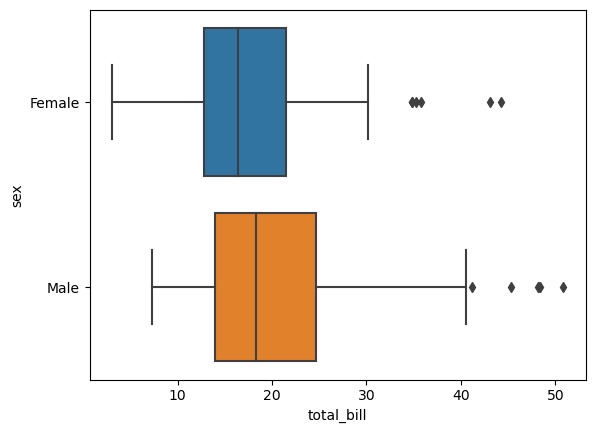

In [31]:
sns.boxplot(y='sex', x='total_bill', data=tips)
plt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [32]:
tips.loc[(tips['day']=='Sun') | (tips['day']=='Sat')].groupby(['day','time'])['total_bill'].max()

day  time  
Sat  Dinner    50.81
Sun  Dinner    48.17
Name: total_bill, dtype: float64

### 15. Compute the percentage of missing values in the dataset.

In [33]:
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [34]:
tips.duplicated().sum()

1

In [35]:
tips.drop_duplicates(inplace=True)

In [36]:
tips.duplicated().sum()

0

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

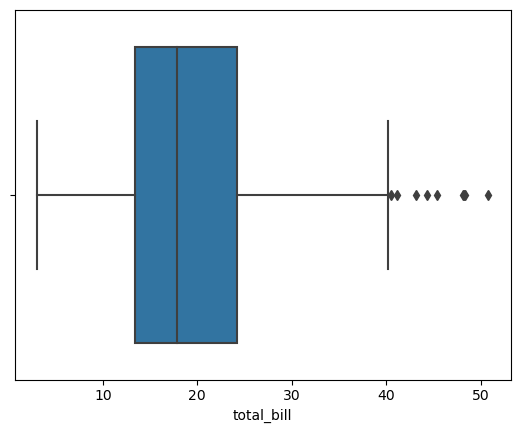

In [37]:
sns.boxplot(x=tips['total_bill'])
plt.show()

In [38]:
tips['total_bill_transformed']=np.log(tips['total_bill'])

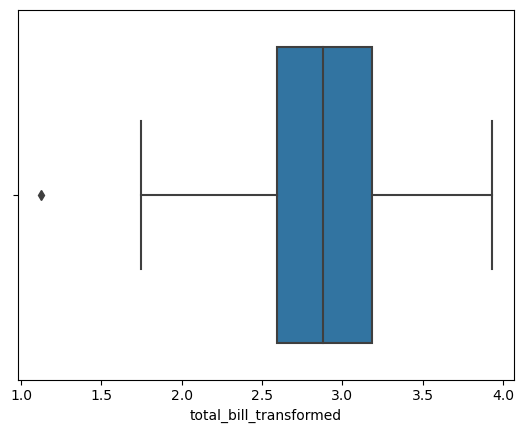

In [39]:
sns.boxplot(x=tips['total_bill_transformed'])
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

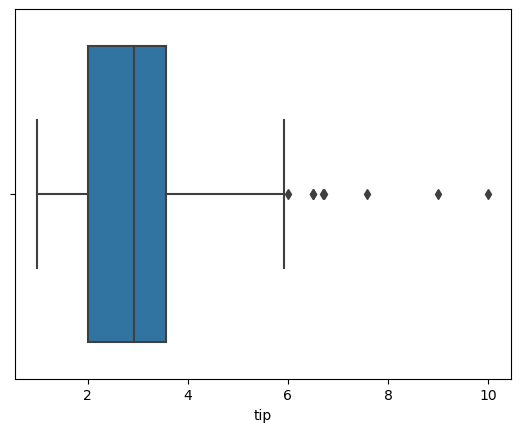

In [40]:
sns.boxplot(x=tips['tip'])
plt.show()

In [41]:
q1=tips['tip'].quantile(0.25)
q3=tips['tip'].quantile(0.75)
iqr=q3-q1


In [42]:
lb=q1-(1.5*iqr)

In [43]:
ub=q3+(1.5*iqr)

In [44]:
tips['tip']=np.where(tips['tip']>ub,ub,tips['tip'])

In [45]:
tips['tip']=np.where(tips['tip']<lb,lb,tips['tip'])

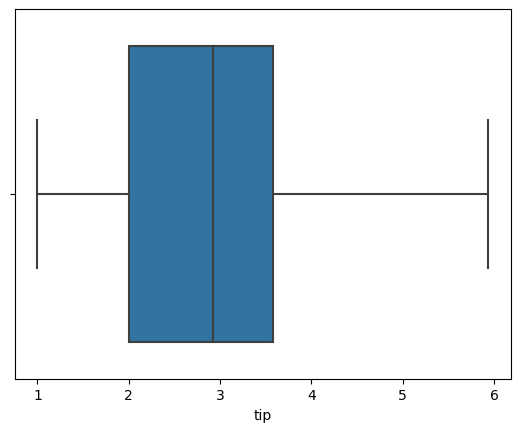

In [46]:
sns.boxplot(x=tips['tip'])
plt.show()

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [47]:
tips=pd.get_dummies(tips, drop_first=True)

In [48]:
tips.head()

,total_bill,tip,size,total_bill_transformed,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,2.832625,False,False,False,True,False,False
1,10.34,1.66,3,2.336020,True,False,False,True,False,False
2,21.01,3.50,3,3.044999,True,False,False,True,False,False
3,23.68,3.31,2,3.164631,True,False,False,True,False,False
4,24.59,3.61,4,3.202340,False,False,False,True,False,False


In [49]:
tips.replace(False,0,inplace=True)

In [50]:
tips.replace(True,1,inplace=True)

In [51]:
tips.head()

,total_bill,tip,size,total_bill_transformed,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,2.832625,0,0,0,1,0,0
1,10.34,1.66,3,2.336020,1,0,0,1,0,0
2,21.01,3.50,3,3.044999,1,0,0,1,0,0
3,23.68,3.31,2,3.164631,1,0,0,1,0,0
4,24.59,3.61,4,3.202340,0,0,0,1,0,0


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [52]:
range=tips['total_bill'].max()-tips['total_bill'].min()

In [53]:
range

47.74

In [54]:
mm=MinMaxScaler()

In [55]:
tips['total_bill_mm']=mm.fit_transform(tips[['total_bill']])

In [56]:
range_1=tips['total_bill_mm'].max()-tips['total_bill_mm'].min()

In [57]:
range_1

0.9999999999999999

### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [58]:
tips_df=pd.read_csv('tips.csv')

In [59]:
tips_df=pd.get_dummies(tips_df,drop_first=True)

In [60]:
tips_df.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


In [61]:
tips_df.replace(True,1,inplace=True)

In [62]:
tips_df.replace(False,0,inplace=True)

In [63]:
tips_df.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0
2,21.01,3.50,3,1,0,0,1,0,0
3,23.68,3.31,2,1,0,0,1,0,0
4,24.59,3.61,4,0,0,0,1,0,0


In [64]:
X=tips_df.drop('tip',axis=1)

In [65]:
y=tips_df['tip']

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [66]:
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.30)

In [101]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(170, 8) (170,)
(74, 8) (74,)


In [67]:
mm=MinMaxScaler()

In [73]:
x_train.iloc[:,:2]=mm.fit_transform(x_train.iloc[:,:2])

In [81]:
x_train.head()

,total_bill,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
185,0.369083,0.8,1,0,0,1,0,0
111,0.087558,0.0,0,0,1,0,0,0
95,0.777126,0.6,1,1,0,0,0,0
182,0.885630,0.4,1,1,0,1,0,0
30,0.135735,0.2,1,0,1,0,0,0


In [76]:
x_test.iloc[:,:2]=mm.transform(x_test.iloc[:,:2])

In [80]:
x_test.head()

,total_bill,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
134,0.318182,0.2,0,0,0,0,1,1
46,0.401341,0.2,1,0,0,1,0,0
71,0.293255,0.4,0,0,1,0,0,0
102,0.863636,0.4,0,1,1,0,0,0
12,0.258693,0.2,1,0,0,1,0,0


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [87]:
lr=LinearRegression()

In [183]:
model=lr.fit(x_train,y_train)

In [184]:
pred=model.predict(x_test)

In [185]:
pred

array([2.76872192, 3.18746968, 2.82453594, 5.44535063, 2.50201647,
       1.83266788, 2.36277346, 3.5380636 , 4.67420412, 3.19483372,
       2.1173824 , 1.79285881, 1.87046713, 3.18309969, 2.88900245,
       2.40697881, 1.91475486, 3.68334398, 3.16842467, 2.54918772,
       1.34306685, 2.94666778, 3.27146493, 1.9251334 , 1.84609674,
       2.52294034, 4.03831359, 2.43423774, 4.1744066 , 2.43759796,
       3.82180286, 5.04127591, 2.18058092, 4.96806056, 2.37606298,
       1.77124155, 2.2732841 , 3.06641851, 2.32955767, 2.13418041,
       2.3550343 , 2.70735047, 2.67701498, 2.31236412, 4.26377838,
       4.02199551, 3.2743759 , 3.12204463, 1.5596823 , 2.91167793,
       2.01127782, 6.8362248 , 4.08305056, 4.95545361, 2.88683272,
       2.19356622, 2.21213317, 3.32411999, 1.98513023, 4.14145541,
       2.69280968, 3.17976121, 3.67741525, 2.27151898, 2.46376798,
       2.02536937, 1.9757051 , 2.48958846, 3.12861235, 1.94092488,
       2.68920533, 4.66056505, 4.69126227, 3.6328885 ])

In [186]:
print('R2Score:', r2_score(y_test,pred))

R2Score: 0.2002022019544344


### Happy Learning:)